<a href="https://colab.research.google.com/github/Mansufa/FIAP/blob/main/PCA_Simples_aplica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import pandas as pd

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df[features].values
y = df['target'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
df_padronizado = pd.DataFrame(X, columns=features)
display(df_padronizado.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [ ]:
df_pca = pd.DataFrame(data = principalComponents,
                      columns = ['principal component 1', 'principal component 2'])

target = pd.Series(iris['target'], name = 'target')
result_df = pd.concat([df_pca, target], axis = 1)
result_df

,principal component 1,principal component 2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


In [ ]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))* 100, 2))

Variance of each component: [0.72962445 0.22850762]

 Total Variance Explained: 95.81


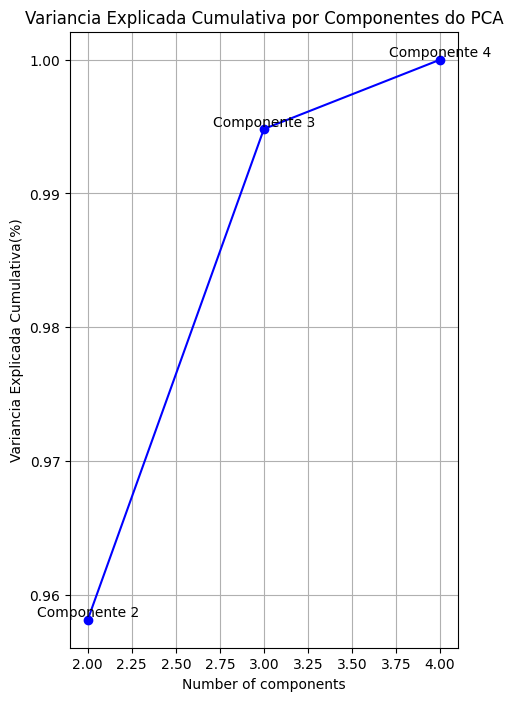

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

results = []

X = df_padronizado

for n in range(2, 5):
  pca = PCA(n_components=n)
  pca.fit(X)
  explained_variance = np.sum(pca.explained_variance_ratio_)
  results.append(explained_variance)

plt.figure(figsize=(5,8))
plt.plot(range(2, 5), results, marker='o', linestyle='-', color='b')
plt.xlabel('Number of components')
plt.ylabel('Variancia Explicada Cumulativa(%)')
plt.title('Variancia Explicada Cumulativa por Componentes do PCA')
plt.grid(True)
for i, (n_components, explained_var) in enumerate(zip(range(2, 5), results)):
    plt.text(n_components, explained_var, f'Componente {n_components}', ha='center', va='bottom')
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_fifa = pd.read_csv("/content/players_22.csv")
df_fifa

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [ ]:
display(df_fifa.describe())

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,19178.000000,19178.000000,19239.000000,759.000000,759.000000,19239.000000,19239.000000,19239.000000,1.806300e+04,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,20.945250,2022.764000,58.602682,14480.848485,12.567852,2.946151,2.352461,1.094184,5.374044e+06,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,64.652893,64.714902,63.500078,61.450023,64.068611,57.776860,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,17.909369,1.213203,50.298614,35328.730217,7.039116,0.671560,0.767659,0.371098,1.494837e+07,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,18.034661,19.721023,17.294183,14.490858,17.653329,18.784590,18.181085,17.178590,15.026569,16.663722,15.167399,14.965426,14.862285,9.042281,14.324789,13.192224,12.122977,16.145279,12.663518,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,2021.000000,1.000000,1318.000000,1.000000,1.000000,1.000000,1.000000,1.600000e+04,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,9.000000,2022.000000,21.000000,1338.000000,7.000000,3.000000,2.000000,1.000000,8.060000e+05,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,35.000000,31.000000,44.000000,55.000000,57.000000,58.000000,55.000000,56.000

In [ ]:
print("informações sobre o DataFrame df_fifa:")
print(df_fifa.info())

informações sobre o DataFrame df_fifa:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB
None


In [ ]:
df_fifa_numerico = df_fifa.select_dtypes([np.number])

correlation_matrix = df_fifa_numerico.corr()
correlation_matrix

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
sofifa_id,1.000000,-0.491523,0.037576,-0.128102,-0.253044,-0.781023,-0.100362,-0.207461,0.110305,-0.036769,0.183841,0.128058,0.065832,-0.009138,0.179041,-0.121359,-0.139709,-0.334292,-0.113962,0.162743,-0.301698,-0.412920,-0.296408,-0.234020,-0.403516,-0.166999,-0.126239,-0.149084,-0.183969,-0.197351,-0.085064,-0.212534,-0.230161,-0.229260,-0.142978,0.103243,0.101162,-0.059928,-0.482973,0.015254,-0.327861,-0.222044,-0.115509,-0.305497,-0.203978,-0.246133,-0.173451,-0.135519,-0.267625,-0.182124,-0.420836,-0.161311,-0.094413,-0.078453,-0.105188,-0.108329,-0.106830,-0.114416,-0.106377,-0.431193
overall,-0.491523,1.000000,0.644275,0.554684,0.601764,0.459451,0.042787,0.150324,-0.226640,-0.179032,-0.186166,0.184987,-0.168315,-0.214303,-0.116020,0.223762,0.376226,0.470647,0.545197,0.174695,0.489623,0.715001,0.666402,0.346760,0.529234,0.401356,0.338746,0.343901,0.516788,0.380942,0.384351,0.420423,0.381030,0.498216,0.460411,0.194044,0.205736,0.270279,0.871823,0.123700,0.561180,0.284689,0.385150,0.364366,0.410010,0.400161,0.316470,0.358562,0.523025,0.343690,0.708867,0.312093,0.259773,0.233589,-0.010990,-0.011080,-0.012986,-0.002485,-0.007960,0.499533
potential,0.037576,0.644275,1.000000,0.527738,0.497611,-0.264142,0.004403,-0.016912,-0.330928,-0.153075,0.009784,0.345188,-0.247198,-0.185054,-0.027984,0.157053,0.283746,0.357283,0.537715,0.258817,0.287862,0.437655,0.490270,0.162151,0.155740,0.243757,0.230814,0.192825,0.367162,0.235766,0.311396,0.270217,0.207769,0.324791,0.347172,0.232621,0.235577,0.223385,0.522483,0.136890,0.332292,0.096992,0.199743,0.073567,0.243294,0.191501,0.157728,0.233070,0.345298,0.208062,0.426790,0.161288,0.156649,0.140869,-0.043093,-0.044989,-0.047030,-0.040184,-0.042383,0.230408
value_eur,-0.128102,0.554684,0.527738,1.000000,0.823527,0.042886,0.010291,0.035188,-0.191468,-0.117917,-0.067670,0.217051,-0.083983,-0.084325,-0.017193,0.149757,0.257232,0.632181,0.995460,0.181934,0.290294,0.404774,0.404812,0.147359,0.215105,0.227414,0.217691,0.165921,0.297419,0.238366,0.240916,0.252820,0.214721,0.278721,0.269854,0.157690,0.164682,0.176597,0.492741,0.117887,0.301723,0.118294,0.198771,0.128684,0.231585,0.183251,0.141060,0.224097,0.324453,0.196231,0.389065,0.140981,0.120724,0.103512,-0.022090,-0.022474,-0.021599,-0.021292,-0.019929,0.204340
wage_eur,-0.253044,0.601764,0.497611,0.823527,1.000000,0.158490,0.028062,0.066208,-0.240514,-0.126592,-0.069797,0.187222,-0.092472,-0.105601,-0.100610,0.160240,0.272319,0.675637,0.821330,0.134479,0.312219,0.438336,0.421867,0.178856,0.249843,0.253123,0.229687,0.207326,0.324420,0.264481,0.255204,0.281428,0.245725,0.310768,0.293376,0.133496,0.142775,0.171261,0.539616,0.105672,0.344529,0.148923,0.199667,0.162081,0.257850,0.225225,0.170430,0.240612,0.347141,0.228939,0.437174,0.169093,0.144442,0.125646,-0.024234,-0.024443,-0.024328,-0.022675,-0.022762,0.280131
age,-0.781023,0.459451,-0.264142,0.042886,0.158490,1.000000,0.083009,0.239444,0.089276,-0.054432,-0.209275,-0.216373,0.060287,-0.006803,-0.192085,0.082149,

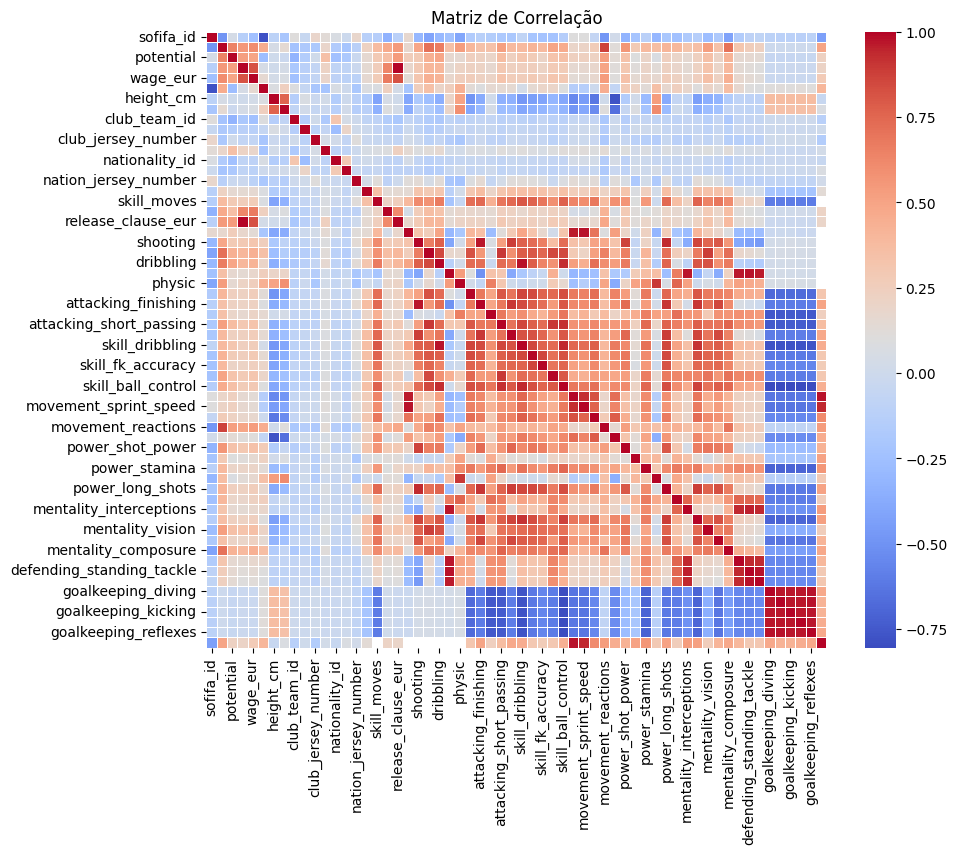

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths =.5)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
df_fifa_numerico.isnull().sum()

,0
sofifa_id,0
overall,0
potential,0
value_eur,74
wage_eur,61
age,0
height_cm,0
weight_kg,0
club_team_id,61
league_level,61


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_fifa_numerico_imputed = pd.DataFrame(imputer.fit_transform(df_fifa_numerico), columns=df_fifa_numerico.columns)


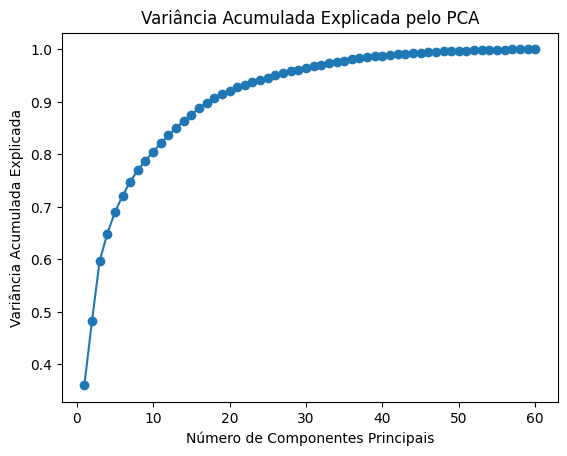

In [ ]:
scaler = StandardScaler()
df_fifa_padronizado = scaler.fit_transform(df_fifa_numerico_imputed)
pca = PCA()
pca.fit(df_fifa_padronizado)
variancia_cumulativa = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(variancia_cumulativa) + 1), variancia_cumulativa, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Acumulada Explicada')
plt.title('Variância Acumulada Explicada pelo PCA')
plt.show()

In [ ]:
limiar_de_variancia = 0.80

num_de_pca = np.argmax(variancia_cumulativa >= limiar_de_variancia) + 1

print(f"Número de Componentes para {limiar_de_variancia * 100}% da Variância: {num_de_pca}")

Número de Componentes para 80.0% da Variância: 10


In [ ]:
pca = PCA(n_components=num_de_pca)
principal_components= pca.fit_transform(df_fifa_padronizado)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.35987355 0.12243569 0.1141741  0.05223797 0.04113113 0.03103841
 0.0268517  0.0224194  0.017692   0.01716971]


In [ ]:
num_components = principal_components.shape[1]
column_names = [f'PC{i+1}' for i in range(1,num_components + 1)] # Corrected range to match the number of components
pca_df = pd.DataFrame(data = principal_components, columns=column_names)

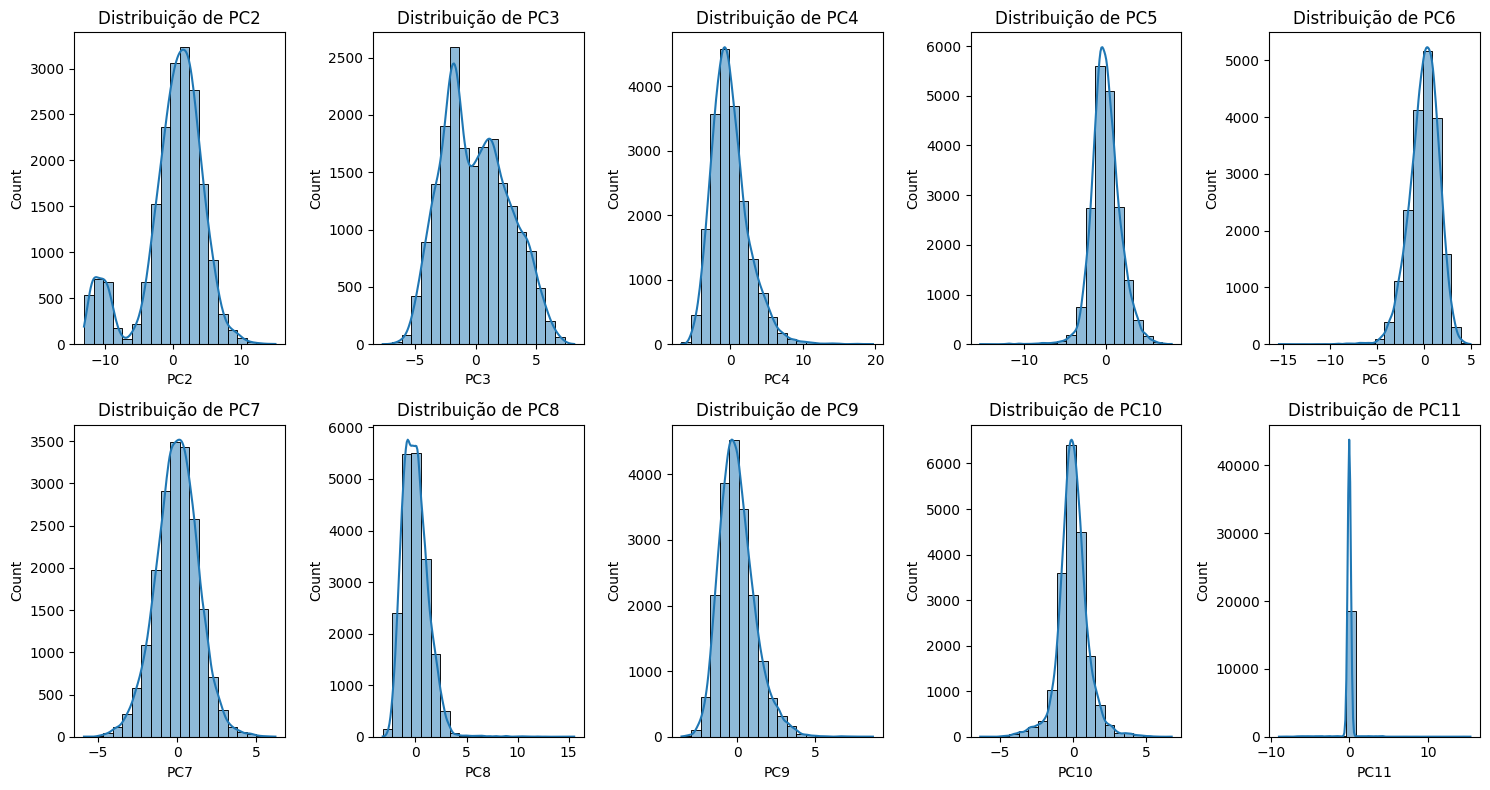

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(pca_df.columns[:10]):
    plt.subplot(2, 5, i + 1)
    sns.histplot(pca_df[col], bins=20, kde = True )
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import shapiro

for column in pca_df.columns:
    stat, p_value = shapiro(pca_df[column])
    print(f'Variável :{column} Estatística do Teste de Shapiro-Wilk para {stat}, Valor p: {p_value}')


if p_value > 0.05:
  print(f'A variável {column} parece seguir distribuição normal')
else:
  print(f'A variável {column} parece seguir distruibuição não é normal')

Variável :PC2 Estatística do Teste de Shapiro-Wilk para 0.9113851673564485, Valor p: 2.4673371650748128e-73
Variável :PC3 Estatística do Teste de Shapiro-Wilk para 0.9811718197086728, Valor p: 5.440130885320952e-44
Variável :PC4 Estatística do Teste de Shapiro-Wilk para 0.9477183222511362, Valor p: 1.7835000921104018e-62
Variável :PC5 Estatística do Teste de Shapiro-Wilk para 0.9725974557911432, Valor p: 2.1453704354600944e-50
Variável :PC6 Estatística do Teste de Shapiro-Wilk para 0.9776812083213937, Valor p: 7.747589352150965e-47
Variável :PC7 Estatística do Teste de Shapiro-Wilk para 0.9974313394954537, Valor p: 1.5720805740285753e-17
Variável :PC8 Estatística do Teste de Shapiro-Wilk para 0.9399681522909651, Valor p: 3.1102027786288305e-65
Variável :PC9 Estatística do Teste de Shapiro-Wilk para 0.9687146873143182, Valor p: 9.17278729691727e-53
Variável :PC10 Estatística do Teste de Shapiro-Wilk para 0.9554893810532342, Valor p: 2.428940674374707e-59
Variável :PC11 Estatística do Te